In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int32  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int32  
 5   loan_grade                  32581 non-null  int32  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int32  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.5 MB


In [10]:
df["person_emp_length"].fillna(df["person_emp_length"].mean(),inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].mean(),inplace=True)

C:\Users\bojja\AppData\Local\Temp\ipykernel_19324\3983919217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(df["person_emp_length"].mean(),inplace=True)
C:\Users\bojja\AppData\Local\Temp\ipykernel_19324\3983919217.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [28]:
corr_matrix = df.corr()
print(corr_matrix["loan_status"].sort_values(ascending=False))


loan_status                   1.000000
loan_percent_income           0.379366
loan_grade                    0.373080
loan_int_rate                 0.319342
person_home_ownership         0.211600
cb_person_default_on_file     0.179141
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
loan_intent                  -0.065575
person_emp_length            -0.080977
person_income                -0.144449
Name: loan_status, dtype: float64


In [25]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [30]:
x = df[["person_age","person_income","loan_amnt","cb_person_cred_hist_length"]]
y = df["loan_status"]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 25,metric = "minkowski",p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [35]:
y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8126438545342949


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5072
           1       0.70      0.28      0.39      1445

    accuracy                           0.81      6517
   macro avg       0.76      0.62      0.64      6517
weighted avg       0.80      0.81      0.78      6517



[[4898  174]
 [1047  398]]


<Axes: >

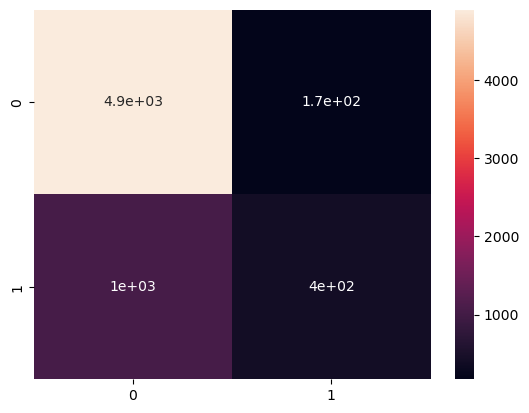

In [36]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)